In [184]:
import pandas as pd
import re
from cleanco import basename

# Load datasets
wacc_df = pd.read_csv("wacc_all.csv", delimiter=";")
names_df = pd.read_csv("names.csv")

# Ensure column names are consistent for merging
wacc_df.columns = wacc_df.columns.str.strip()
names_df.columns = names_df.columns.str.strip()

# Merge both
merged_df = pd.merge(names_df, wacc_df, on="Instrument", how="outer")

# Rename the column
merged_df.rename(columns={merged_df.columns[1]: "company"}, inplace=True)

# Cleaning function to standardize names
def clean_name(name):
    if pd.isnull(name):
        return ""
    # Remove comprehensive multi-word legal and industry-specific terms
    name = re.sub(
        r"\b(GMBH & CO\.? KG|SP\. Z O\.O\.|KORLATOLT FELELOSSEGU TARSASAG|"
        r"ZARTKORUEN MUKODO RESZVENYTARSASAG|SOCIEDAD LIMITADA UNIPERSONAL|"
        r"SOCIEDADE INDUSTRIAL DE|FERME EOLIENNE L'EPINETTE|GREENALIA WIND POWER|"
        r"PARQUE EOLICO|ENERGIAS RENOVAVEIS|SOLAR POWER S\.R\.L\.|EOLIENNES DE|"
        r"WIND FARM|SOLARINVEST|WINDFARM SP\.|SOCIETA' AGRICOLA|L'EXTENSION DES|"
        r"PAYS DE SOMME|SISTEMAS ENERGETICOS|VINDPARK AB|AGUAS DE LANZAROTE SA|"
        r"ADMINISTRATIA PIETELOR AGROALIMENTARE|WIATROWA KOLOBRZEG|SOLARIS 48 SRL|"
        r"RENEWABLES PORTUGAL|ENGIE GREEN|D'EXPLOITATION EOLIENNE|FARMA WIATROWA|"
        r"ENERGIANTUOTANTO OY|FOTOVOLTAICA LOTE A|BUERGERWINDPARK EIDERLAND|"
        r"WOODHOUSE WINDFARM|VALLE DORA ENERGIA|PHOTOVOLTAIQUE DE LA|ELEKTROWNIA PARNOWO|"
        r"DE LA ROCHE|CARRASCAL SOCIEDAD ANONIMA|ENERGIEPARK HAHNENNEST GMBH|"
        r"VJETROELEKTRANA JELINAK|HYDROENERGY POWER SRL|KERNBRENNSTOFFEN AG|"
        r"ERLOES- UND INFRASTRUKTUR|ATLANTIC SVERIGE AB|COOLLEGREAN WINDFARM LIMITED|"
        r"EOLIENNE DES LONGUES ROIES|BUERGERENERGIE II GMBH|ONDERWIJS MOL|EOLICO FORLETO NUOVO|"
        r"ELECTRICA DEL PUERTO DE LA CRUZ|KRUPY WIND INVEST|BUKOWSKO WIND ENERGY|"
        r"RYCHWAL SP\. Z|HELLENIQ RENEWABLES SINGLE|SOSTENIBLE SOCIEDAD|ENERGIES INVESTISSEMENTS|"
        r"FARMA WIATROWA KOLOBRZEG|EOLICA WOJCIECHOWO SP\.|D'EXPLOITATION EOLIENNE D'ORVILLIERS)\b",
        "",
        name,
    )
    # Remove individual legal terms, regional terms, and descriptors
    name = re.sub(
        r"\b(SE|S\.P\.A\.?|GMBH|ASA|SPA|AG|SA|INC\.?|LIMITED|LTD|LLC|PLC|"
        r"B\.V\.|CO\.|CORP\.?|LLP|SARL|PTY\.?|BVBA|N\.V\.|OYJ|AB|LTDA|SL|"
        r"OAO|PT|SDN BHD|UAB|SRL|LLLP|JSC|AS|LDA|GENOSSENSCHAFT|COMPANIE|APS)\b",
        "",
        name,
    )
    # Remove industry and descriptive terms
    name = re.sub(
        r"\b(GROUP|HOLDINGS?|ASSOCIATES?|PARTNERS?|FUND|VENTURES?|COMPANY|"
        r"ENTERPRISES?|INTERNATIONAL|WORLDWIDE|DEVELOPMENT|SERVICES?|SOLUTIONS?|"
        r"INVESTMENTS?|MANAGEMENT|CONSULTING|ENGINEERING|TECHNOLOGY|ENERGY|"
        r"RESOURCES|SYSTEMS?|POWER|OPERATIONS|SOLAR|RENOVABLES)\b(?=\s*$)",
        "",
        name,
    )
    # Remove content in parentheses, quotes, and commas
    name = re.sub(r"\s*\(.*?\)\s*", "", name)
    name = re.sub(r"\s*\".*?\"\s*", "", name)
    name = name.replace(",", "")
    # Standardize symbols and handle punctuation
    name = name.replace("&", "AND").replace("-", " ")
    # Remove non-alphanumeric characters and extra spaces
    name = re.sub(r"[^A-Za-z0-9\s]", "", name)
    name = re.sub(r"\s+", " ", name).strip()
    return name.upper()

merged_df["cleaned_name"] = merged_df["company"].apply(clean_name)

# Cleaning function using cleanco's basename
def clean_with_basename(name):
    if pd.isnull(name):
        return ""
    return basename(name).upper()

merged_df["cleaned_name"] = merged_df["cleaned_name"].apply(clean_with_basename)

merged_df

,Instrument,company,"Weighted Average Cost of Capital, (%)","WACC Debt Weight, (%)","WACC Tax Rate, (%)",Date,lei,sector,listed,hq,soe,ren,cleaned_name
0,00N.NFF,00Nation AS,NaN,NaN,NaN,31.12.2022,2549007Z0KPYH5DX8M76,Consumer Cyclicals,1,Norway,0,,00NATION
1,033A.D,Spac Four AG,NaN,NaN,NaN,31.12.2022,894500592FG04R6TF807,Industrials,1,Germany,0,,SPAC FOUR
2,08N.WA,Octava SA,5.060683,32.971069,19.707225,31.12.2022,259400PH9SC8DVWA4A65,Industrials,1,Poland,0,,OCTAVA
3,08N.WA,Octava SA,5.808155,32.616738,20.252340,31.12.2021,259400PH9SC8DVWA4A65,Industrials,1,Poland,0,,OCTAVA
4,08N.WA,Octava SA,2.683403,31.805765,24.613025,31.12.2020,259400PH9SC8DVWA4A65,Industrials,1,Poland,0,,OCTAVA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,ZZb.ST,Zinzino AB,9.324271,7.068700,20.913715,31.12.2021,549300Z20D1BP4MA0040,Consumer Cyclicals,1,Sweden,0,,ZINZINO
27157,ZZb.ST,Zinzino AB,9.368513,2.589935,21.740835,31.12.2020,549300Z20D1BP4MA0040,Consumer Cyclicals,1,Sweden,0,,ZINZINO
27158,ZZb.ST,Zinzino AB,9.138674,3.420242,21.721480,31.12.2019,549300Z20D1BP4MA0040,Consumer Cyclicals,1,Sweden,0,,ZINZINO
27159,ZZb.ST,Zinzino AB,-0.392489,9.664115,21.250690,31.12.2018,549300Z20D1BP4MA0040,Consumer Cyclicals,1,Sweden,0,,ZINZINO


In [186]:
owners = pd.read_excel("plant_owners.xlsx")

owners.rename(columns={owners.columns[0]: "company"}, inplace=True)

owners["cleaned_name"] = owners["company"].apply(clean_name)

owners["cleaned_name"] = owners["cleaned_name"].apply(clean_with_basename)

# Perform an exact match based on 'cleaned_name'
matches = pd.merge(owners, merged_df, on='cleaned_name', how='inner')

# Count the number of unique 'cleaned_name' values in the matches
unique_cleaned_names_count = matches['cleaned_name'].nunique()

print(f"Number of unique cleaned_name in matches: {unique_cleaned_names_count}")

matches

Number of unique cleaned_name in matches: 143


,company_x,tickers,. . Ownership,cleaned_name,Instrument,company_y,"Weighted Average Cost of Capital, (%)","WACC Debt Weight, (%)","WACC Tax Rate, (%)",Date,lei,sector,listed,hq,soe,ren
0,Hexicon Ab,NaN,NaN,HEXICON,HEXI.ST,Hexicon AB,6.564289,45.712040,21.435250,31.12.2022,9845007784687FEF7569,Energy,1,Sweden,0,
1,Hexicon Ab,NaN,NaN,HEXICON,HEXI.ST,Hexicon AB,3.645470,1.609015,20.913715,31.12.2021,9845007784687FEF7569,Energy,1,Sweden,0,
2,Hexicon Ab,NaN,NaN,HEXICON,HEXI.ST,Hexicon AB,7.226280,0.050642,21.740835,31.12.2020,9845007784687FEF7569,Energy,1,Sweden,0,
3,Hexicon Ab,NaN,NaN,HEXICON,HEXI.ST,Hexicon AB,NaN,NaN,NaN,31.12.2019,9845007784687FEF7569,Energy,1,Sweden,0,
4,Hexicon Ab,NaN,NaN,HEXICON,HEXI.ST,Hexicon AB,NaN,NaN,NaN,31.12.2018,9845007784687FEF7569,Energy,1,Sweden,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,Outokumpu Oyj,NaN,NaN,OUTOKUMPU,OUT1V.HE,Outokumpu Oyj,10.194572,28.541946,19.419884,31.12.2021,5493009YRUJJDCFF0R80,Basic Materials,1,Finland,FALSCH,1578240
909,Outokumpu Oyj,NaN,NaN,OUTOKUMPU,OUT1V.HE,Outokumpu Oyj,8.390715,31.173254,21.042355,31.12.2020,5493009YRUJJDCFF0R80,Basic Materials,1,Finland,FALSCH,1573560
910,Outokumpu Oyj,NaN,NaN,OUTOKUMPU,OUT1V.HE,Outokumpu Oyj,4.629681,61.440804,20.598540,31.12.2019,5493009YRUJJDCFF0R80,Basic Materials,1,Finland,FALSCH,1616700
911,Outokumpu Oyj,NaN,NaN,OUTOKUMPU,OUT1V.HE,Outokumpu Oyj,6.039539,59.196140,20.717150,31.12.2018,5493009YRUJJDCFF0R80,Basic Materials,1,Finland,FALSCH,


In [188]:
# Get unmatched rows from `owners`
unmatched_owners = owners[~owners['cleaned_name'].isin(matches['cleaned_name'])]

unique_cleaned_names_count_ow = unmatched_owners['cleaned_name'].nunique()
print(f"Number of unique cleaned_name in owners that wasn't matched: {unique_cleaned_names_count_ow}")

unmatched_owners


Number of unique cleaned_name in owners that wasn't matched: 2657


,company,tickers,. . Ownership,cleaned_name
0,Rushydro PJSC,NaN,NaN,RUSHYDRO PJSC
3,OX2 AB,NaN,NaN,OX2
4,Teollisuuden Voima Oyj,NaN,NaN,TEOLLISUUDEN VOIMA
5,Electricite de France SA,NaN,NaN,ELECTRICITE DE FRANCE
6,Iran Water and Power Resources Development Com...,NaN,NaN,IRAN WATER AND POWER RESOURCES DEVELOPMENT
...,...,...,...,...
2832,Sone Enerji Yatirim Uretim ve Ticaret AS,NaN,NaN,SONE ENERJI YATIRIM URETIM VE TICARET
2833,Gunvor Group Ltd,NaN,NaN,GUNVOR GROUP
2834,OMV Australia Pty Limited,NaN,NaN,OMV AUSTRALIA PTY
2835,Albula Landwasser Kraftwerke AG,NaN,NaN,ALBULA LANDWASSER KRAFTWERKE


In [190]:
from collections import Counter
from name_matching.name_matcher import NameMatcher
from sentence_transformers import SentenceTransformer, util
from difflib import SequenceMatcher

# --- Frequency-based identification of generic words ---
def identify_generic_words(data, column, threshold=0.02):
    all_words = [word for name in data[column] for word in name.split()]
    word_counts = Counter(all_words)
    total_names = len(data)
    generic_words = {word for word, count in word_counts.items() if count / total_names > threshold}
    return generic_words

def score_boost(name1, name2, generic_words):
    tokens1 = set(name1.split())
    tokens2 = set(name2.split())
    if tokens1.issubset(tokens2) or tokens2.issubset(tokens1):
        meaningful_tokens = tokens1.intersection(tokens2) - generic_words
        if meaningful_tokens:
            return 30
    return 0

# --- Load Pre-trained Model for Sentence Embeddings ---
model = SentenceTransformer('all-mpnet-base-v2')

# --- Preprocess Data ---
generic_words_merged = identify_generic_words(merged_df, 'cleaned_name', threshold=0.02)
generic_words_owners = identify_generic_words(unmatched_owners, 'cleaned_name', threshold=0.02)

# Combine generic words from both datasets
generic_words = generic_words_merged.union(generic_words_owners)

# Initialize NameMatcher
matcher = NameMatcher(
    top_n=5,
    lowercase=False,
    punctuations=True,
    remove_ascii=True,
    legal_suffixes=True,
    common_words=True,
    verbose=True
)
matcher.set_distance_metrics(['discounted_levenshtein', 'editex', 'ratcliff_obershelp', 
                              'fuzzy_wuzzy_partial_string', 'weighted_jaccard',
                              'fuzzy_wuzzy_token_sort', 'double_metaphone'])

# --- Fuzzy Matching ---
matcher.load_and_process_master_data('cleaned_name', merged_df)
results_unmatched_owners = matcher.match_names(to_be_matched=unmatched_owners, column_matching='cleaned_name')
results_unmatched_owners_df = pd.DataFrame(results_unmatched_owners)

# Apply Intelligent Score Boost
def adjust_scores(row, generic_words):
    original_score = row['score']
    boost = score_boost(row['original_name'], row['match_name'], generic_words)
    return original_score + boost

results_unmatched_owners_df['adjusted_score'] = results_unmatched_owners_df.apply(
    lambda row: adjust_scores(row, generic_words), axis=1
)

# --- Semantic Similarity Matching ---
merged_embeddings = model.encode(merged_df['cleaned_name'].tolist(), convert_to_tensor=True)
owners_embeddings = model.encode(unmatched_owners['cleaned_name'].tolist(), convert_to_tensor=True)

similarity_scores = util.cos_sim(merged_embeddings, owners_embeddings)

# Convert similarity scores to DataFrame
scores_df = pd.DataFrame(similarity_scores.cpu().numpy(), 
                         index=merged_df['cleaned_name'], 
                         columns=unmatched_owners['cleaned_name'])

# Extract the top matches
threshold = 0.7
top_matches = []
for idx, row in scores_df.iterrows():
    best_match = row.idxmax()
    best_score = row.max()
    if best_score > threshold:
        top_matches.append((idx, best_match, best_score))

top_matches_df = pd.DataFrame(top_matches, columns=['merged_name', 'owner_name', 'similarity_score'])


preprocessing...

preprocessing complete 
 searching for matches...



100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.30s/it]


possible matches found   
 fuzzy matching...



100%|███████████████████████████████████████| 2690/2690 [00:42<00:00, 63.42it/s]


done


In [192]:
results_unmatched_owners_df.rename(columns={'original_name':'merged_name','match_name':'owner_name'},inplace=True)
results_unmatched_owners_df

,merged_name,owner_name,score,match_index,adjusted_score
0,RUSHYDRO PJSC,HYDRACT,41.323468,12418,41.323468
3,OX2,INOX,49.110898,13082,49.110898
4,TEOLLISUUDEN VOIMA,ELIS,39.285697,8464,39.285697
5,ELECTRICITE DE FRANCE,CI,34.917693,5990,34.917693
6,IRAN WATER AND POWER RESOURCES DEVELOPMENT,TOWER RESOURCES,19.920635,24419,19.920635
...,...,...,...,...,...
2832,SONE ENERJI YATIRIM URETIM VE TICARET,RIM,25.941993,21185,25.941993
2833,GUNVOR GROUP,ELIOR GROUP,37.301117,8455,37.301117
2834,OMV AUSTRALIA PTY,OMV,41.035956,18263,71.035956
2835,ALBULA LANDWASSER KRAFTWERKE,SSE,29.060453,23127,29.060453


In [194]:
top_matches_df.rename(columns={'merged_name': 'merged_name', 'owner_semantic': 'owner_name'}, inplace=True)
top_matches_df

,merged_name,owner_name,similarity_score
0,EKOSTAV,EKOVIND,0.749501
1,KT INVEST,RT INVEST,0.757028
2,HANDR GMBH AND CO,HT AIWANGER AND GMBH CO,0.744251
3,HANDR GMBH AND CO,HT AIWANGER AND GMBH CO,0.744251
4,HANDR GMBH AND CO,HT AIWANGER AND GMBH CO,0.744251
...,...,...,...
2020,ZAKLAD BUDOWY MASZYN ZREMB CHOJNICE,MATICE SVATOHOSTYNSKA ZS,0.753265
2021,ZAKLAD BUDOWY MASZYN ZREMB CHOJNICE,MATICE SVATOHOSTYNSKA ZS,0.753265
2022,ZAKLAD BUDOWY MASZYN ZREMB CHOJNICE,MATICE SVATOHOSTYNSKA ZS,0.753265
2023,ZAKLAD BUDOWY MASZYN ZREMB CHOJNICE,MATICE SVATOHOSTYNSKA ZS,0.753265


In [196]:
fuzzy_matching = results_unmatched_owners_df['owner_name'].nunique()
print(f"Number of unique owners matched (e.g., fuzzy matching): {fuzzy_matching}")

semantic=top_matches_df['owner_name'].nunique()
print(f"Number of unique owners matched (e.g., semantic matching): {semantic}")

Number of unique owners matched (e.g., fuzzy matching): 821
Number of unique owners matched (e.g., semantic matching): 269


Unique Matches At or Above Each Threshold:
    Threshold (%)  unmatched_owners
0              15              2492
1              20              2232
2              25              2090
3              30              1842
4              35              1529
5              40              1187
6              45               910
7              50               680
8              55               512
9              60               394
10             65               303
11             70               238
12             75               165
13             80               127
14             85                96
15             90                76
16             95                59
17            100                51


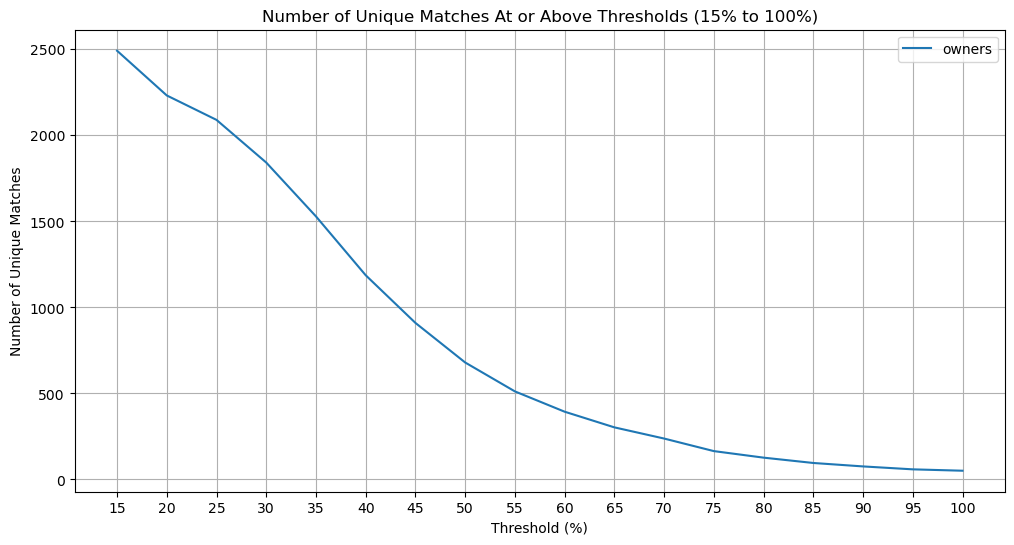

In [198]:
import matplotlib.pyplot as plt

# Function to count matches at or above a given threshold
def count_high_matches(results_df, threshold):
    # Convert scores to numeric if needed
    results_unmatched_owners_df['adjusted_score'] = pd.to_numeric(results_unmatched_owners_df['adjusted_score'], errors='coerce')
    
    # Identify unique cleaned names with at least one match at or above the threshold
    high_matches = results_unmatched_owners_df.groupby('merged_name').filter(
        lambda group: group['adjusted_score'].max() >= threshold
    )['merged_name'].unique()
    
    return len(high_matches)

# Function to compute counts for a range of thresholds
def compute_counts_over_thresholds(results_unmatched_owners_df, thresholds):
    counts = []
    for threshold in thresholds:
        count = count_high_matches(results_unmatched_owners_df, threshold)
        counts.append(count)
    return counts

# Define the range of thresholds (15% to 100% in 5% increments)
thresholds = list(range(15, 101, 5))

# Compute counts for each dataset
counts_unmatched_owners = compute_counts_over_thresholds(results_unmatched_owners_df, thresholds)

# Create a DataFrame for the table
data = {
    'Threshold (%)': thresholds,
    # 'inv_list': counts_inv_list,
    # 'orbis': counts_orbis,
    'unmatched_owners': counts_unmatched_owners
}
threshold_counts_df = pd.DataFrame(data)

# Display the table
print("Unique Matches At or Above Each Threshold:")
print(threshold_counts_df)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(threshold_counts_df['Threshold (%)'], threshold_counts_df['unmatched_owners'], label='owners')

# Customize the plot
plt.title('Number of Unique Matches At or Above Thresholds (15% to 100%)')
plt.xlabel('Threshold (%)')
plt.ylabel('Number of Unique Matches')
plt.xticks(ticks=thresholds)  # Set x-axis ticks to match thresholds
plt.legend()
plt.grid()
plt.show()


In [ ]:
def review_matches(matches_df):
    decision_map = {}  # Dictionary to store decisions for duplicates

    for idx, row in matches_df.iterrows():
        match_pair = (row['original_name'], row['match_name'])

        # Auto-approve if the score is >= 0.85
        if row['adjusted_score'] >= 85:
            matches_df.at[idx, 'approved'] = True
            print(f"Auto-approved: {row['original_name']} <-> {row['match_name']} (Score: {row['adjusted_score']})")
            continue

        # If the decision is already made, auto-apply it
        if match_pair in decision_map:
            matches_df.at[idx, 'approved'] = decision_map[match_pair]
            print(f"Auto-applied decision for: {row['original_name']} <-> {row['match_name']}")
            continue

        # Otherwise, prompt for a decision
        print(f"Matched: {row['original_name']} <-> {row['match_name']} (Score: {row['adjusted_score']})")
        action = input("Approve (a), Reject (r), Skip (s): ").lower()

        if action == 'a':
            decision_map[match_pair] = True
            matches_df.at[idx, 'approved'] = True
        elif action == 'r':
            decision_map[match_pair] = False
            matches_df.at[idx, 'approved'] = False
        else:
            matches_df.at[idx, 'approved'] = None

    return matches_df  # Return the updated DataFrame

# Add an 'approved' column based on review
results_unmatched_owners_df['approved'] = None
results_unmatched_owners_df = review_matches(results_unmatched_owners_df)

In [ ]:
def review_matches(matches_df):
    decision_map = {}  # Dictionary to store decisions for duplicates

    for idx, row in matches_df.iterrows():
        match_pair = (row['merged_name'], row['owner_name'])

        # Auto-approve if the score is >= 0.85
        if row['similarity_score'] >= 0.85:
            matches_df.at[idx, 'approved'] = True
            print(f"Auto-approved: {row['merged_name']} <-> {row['owner_name']} (Score: {row['similarity_score']})")
            continue

        # If the decision is already made, auto-apply it
        if match_pair in decision_map:
            matches_df.at[idx, 'approved'] = decision_map[match_pair]
            print(f"Auto-applied decision for: {row['merged_name']} <-> {row['owner_name']}")
            continue

        # Otherwise, prompt for a decision
        print(f"Matched: {row['merged_name']} <-> {row['owner_name']} (Score: {row['similarity_score']})")
        action = input("Approve (a), Reject (r), Skip (s): ").lower()

        if action == 'a':
            decision_map[match_pair] = True
            matches_df.at[idx, 'approved'] = True
        elif action == 'r':
            decision_map[match_pair] = False
            matches_df.at[idx, 'approved'] = False
        else:
            matches_df.at[idx, 'approved'] = None

    return matches_df  # Return the updated DataFrame

# Add an 'approved' column based on review
top_matches_df['approved'] = None
top_matches_df = review_matches(matches_df)

In [200]:
results_unmatched_owners_df.rename(columns={'merged_name':'wacc_name'},inplace=True)
top_matches_df.rename(columns={'merged_name':'wacc_name'},inplace=True)


In [202]:
with pd.ExcelWriter('wacc_owners.xlsx') as writer:
    merged_df.to_excel(writer, sheet_name='wacc_merged', index=False)
    matches.to_excel(writer, sheet_name='wacc_owners', index=False)
    results_unmatched_owners_df.to_excel(writer, sheet_name='wacc_owners_fuzzy', index=False)
    top_matches_df.to_excel(writer, sheet_name='wacc_owners_semantic', index=False)

print("Export completed successfully!")


Export completed successfully!
